# Banking EDA 

In [301]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import thinkstats2 
import thinkplot
import seaborn as sns 
import statsmodels.formula.api as smf


In [272]:
#opens file
df = pd.read_csv('Banking_Kaggle.csv')

In [273]:
#rows
print(f'Total Data : {df.shape[0]}')
#columns
print(f'Total Variables : {df.shape[1]}')
#checks missing values 
print(f'Missing Values : {df.isnull().sum().values.sum()}\n')
# df info 
print('Type of Variables in Data:\n')
print(df.info())

Total Data : 10000
Total Variables : 14
Missing Values : 0

Type of Variables in Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [274]:
# tail of df , 10 lines
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [275]:
# prints columns of df
for col in df.columns:
    print(col)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [276]:
# columns i wont use
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)


In [277]:
# statistic of df , distirbution of data & properties
df.describe(include ='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [278]:
# missing median 
print(df.median())

CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64


### histograms 

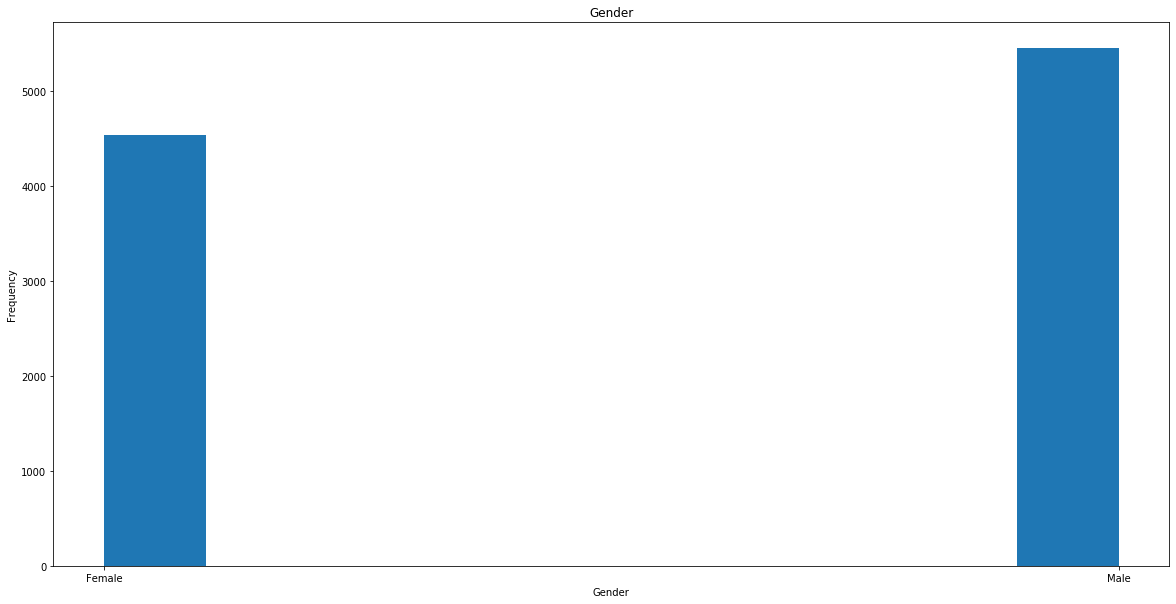

In [305]:
# Gender histogram

plt.hist(x = df.Gender , bins = 10)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

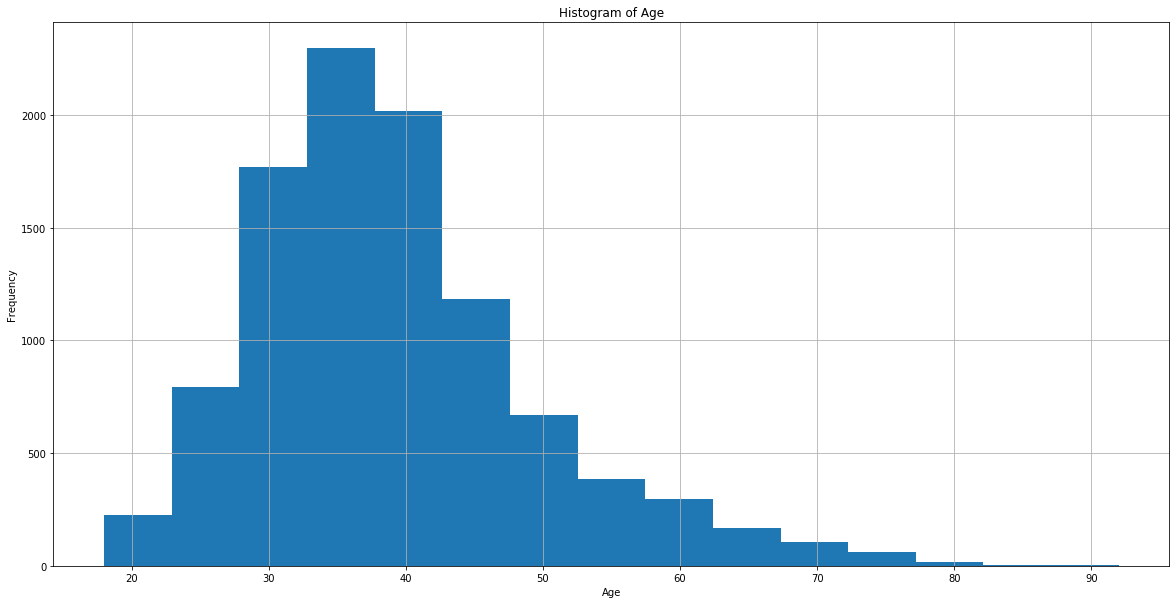

In [280]:
#age in the dataset
plt.hist(x = df.Age, bins = 15)
plt.title('Histogram of Age')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.grid()
plt.show()

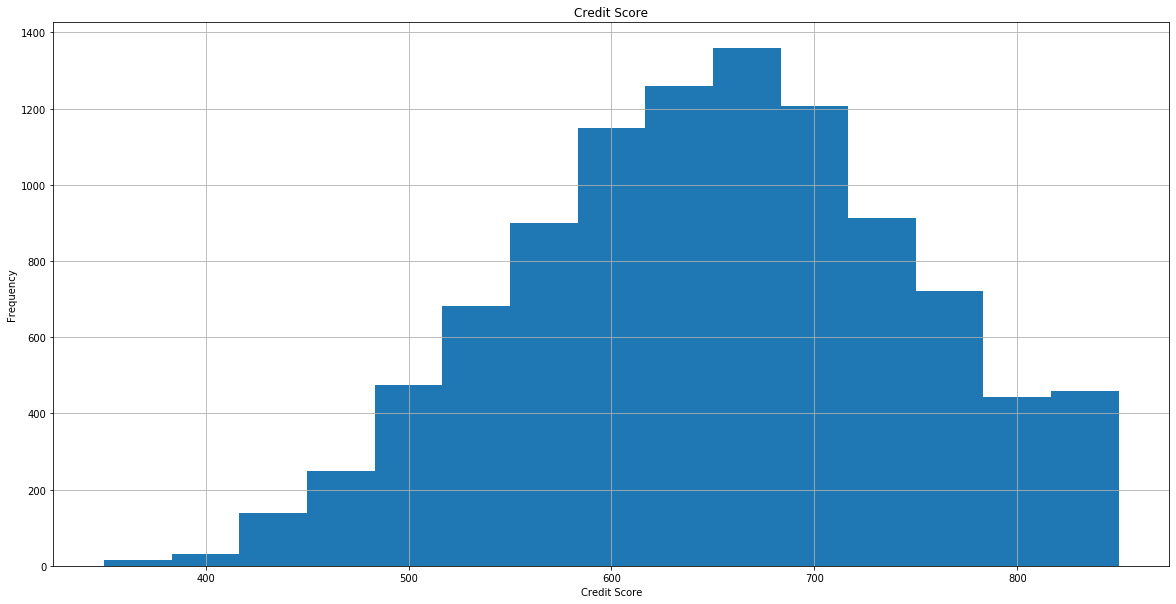

In [281]:
# credit 
plt.hist(x = df.CreditScore, bins = 15)
plt.title('Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

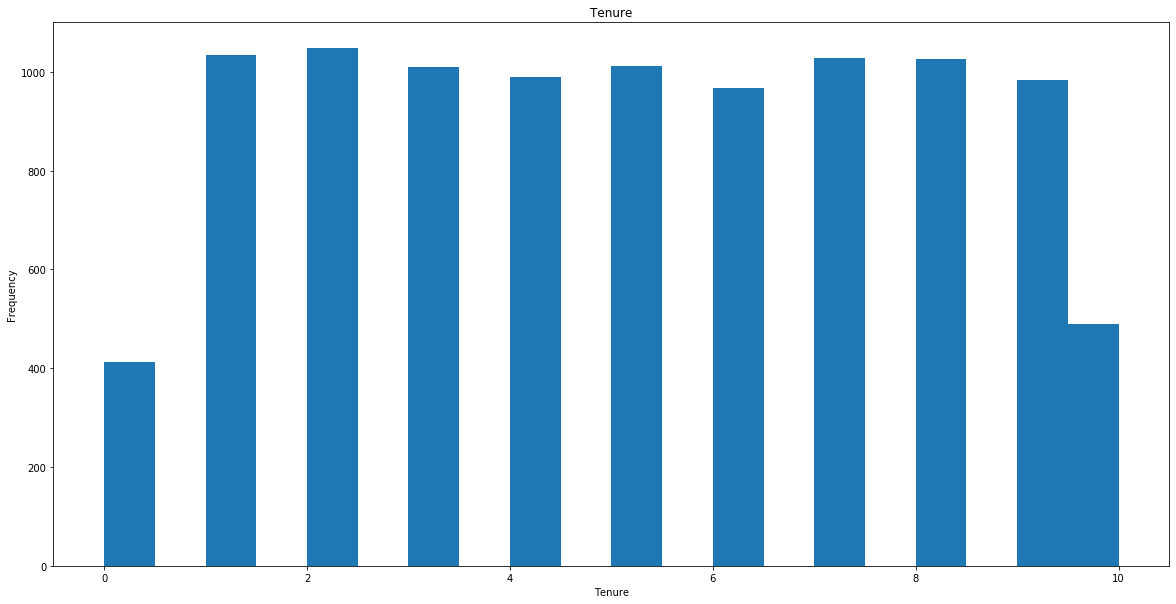

In [282]:
# Tenure
plt.hist(x = df.Tenure, bins =20)
plt.title('Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

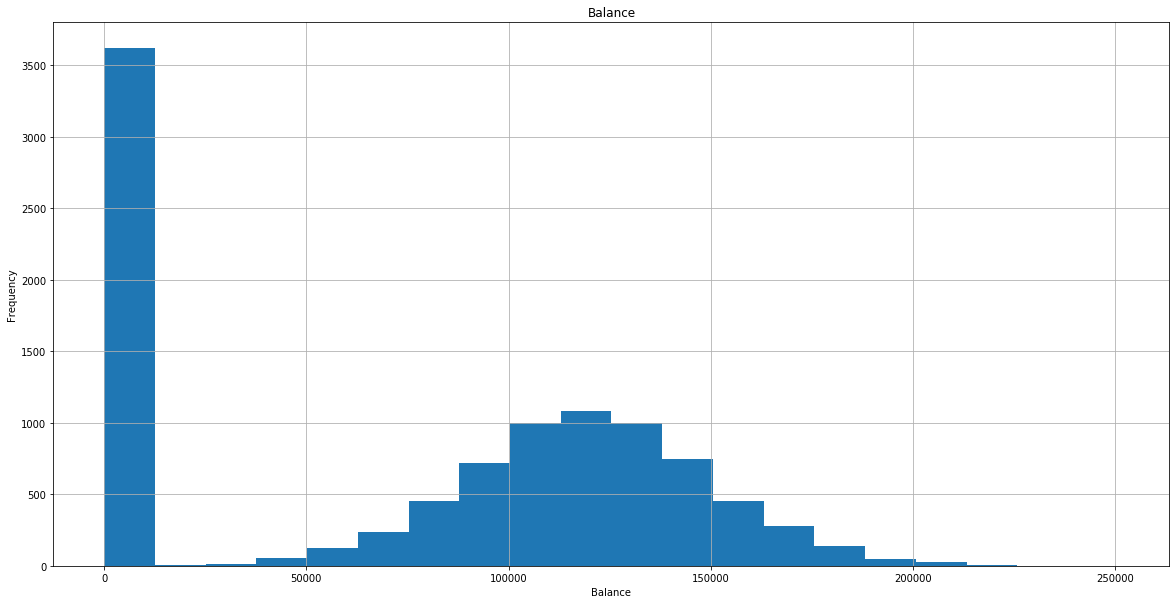

In [283]:
# Balance
plt.hist(x = df.Balance, bins =20)
plt.title('Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### CDF

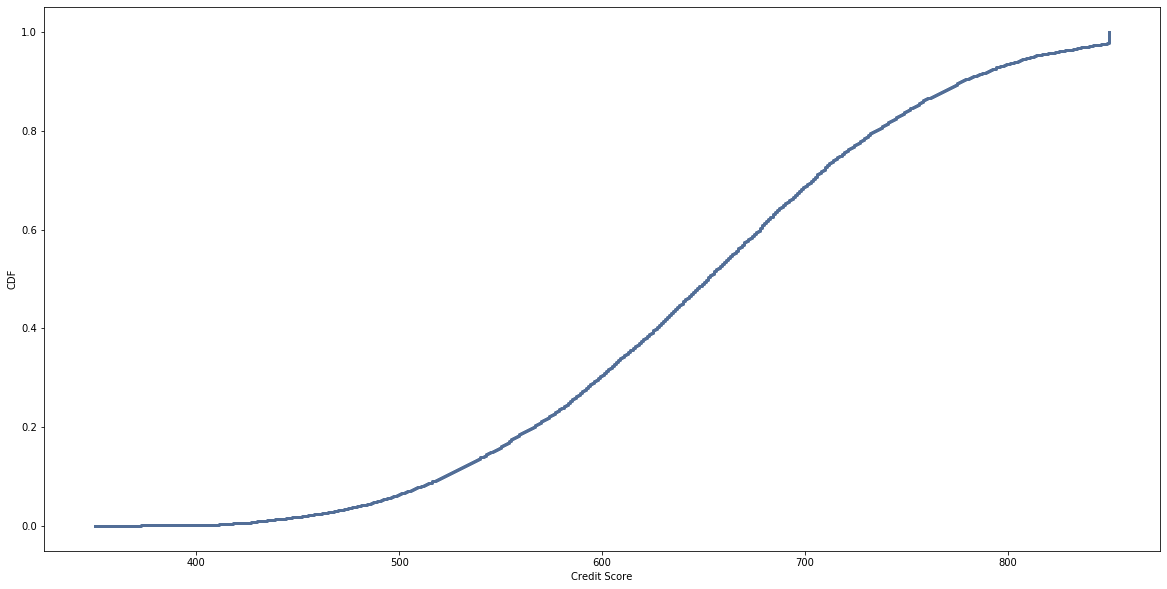

<Figure size 576x432 with 0 Axes>

In [286]:
# create on CDF - going to create a cdf of credit score..
cdf = thinkstats2.Cdf(df.CreditScore, label = 'Credit Score')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel= 'Credit Score', ylabel ='CDF')
plt.show()

### The CDF plot show that the median credit score comes at 650

# pmf

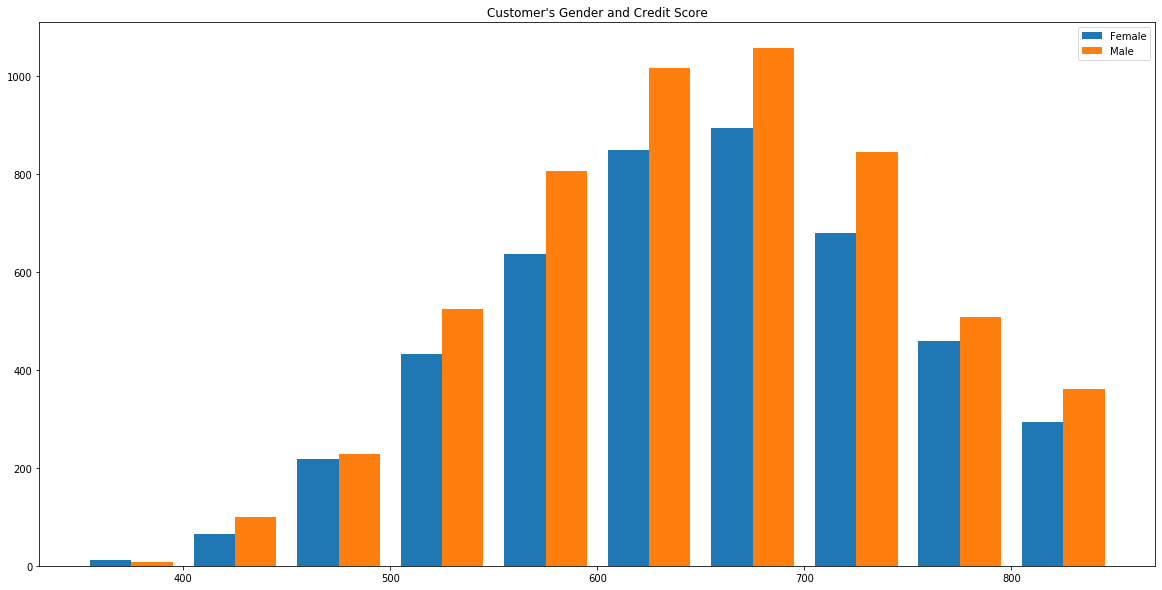

In [291]:
# here im creating a PMF of gender and CreditScore.. i want to find out how CreditScore runs diff depending on gender

male = df[df.Gender == 'Male']
female = df[df.Gender == 'Female']
fig, ax = plt.subplots()
ax.hist([female.CreditScore, male.CreditScore], 10, (350,850),
        histtype='bar', label=('Female','Male'))
ax.set_title('Customer\'s Gender and Credit Score')
ax.legend()
plt.show()

### in this PMF i see that males seems to have a higher score than women. 

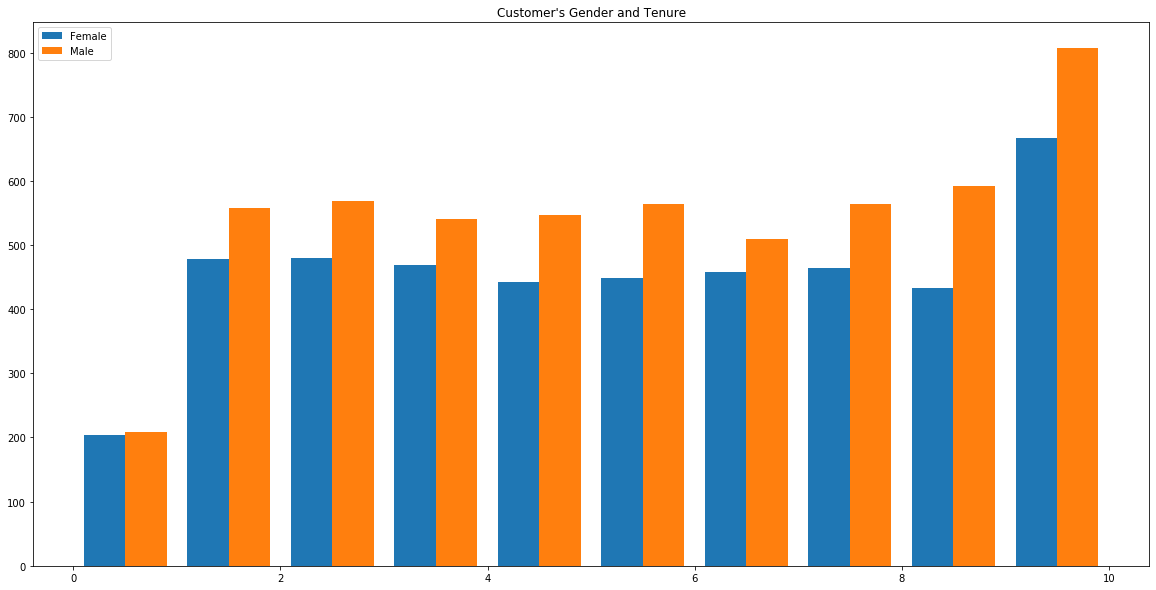

In [292]:
# here im creating a PMF of gender and tenure.. i want to find out how tenure runs diff depending on gender

male = df[df.Gender == 'Male']
female = df[df.Gender == 'Female']
fig, ax = plt.subplots()
ax.hist([female.Tenure, male.Tenure], 10, (0,10),
        histtype='bar', label=('Female','Male'))
ax.set_title('Customer\'s Gender and Tenure')
ax.legend()
plt.show()

### Again males have a greater tenure than women.. except at the beggining ofcourse 

# Analytic Distribution

In [204]:
mu, var = thinkstats2.TrimmedMeanVar(df.CreditScore, p=0.002)
print('Mean:{}\n Var: {}'.format(mu, var,sigma))

Mean:650.693172690763
 Var: 9139.008467444071


In [205]:
sigma = np.sqrt(var)
print('Sigma:',sigma)

Sigma: 95.59816142292733


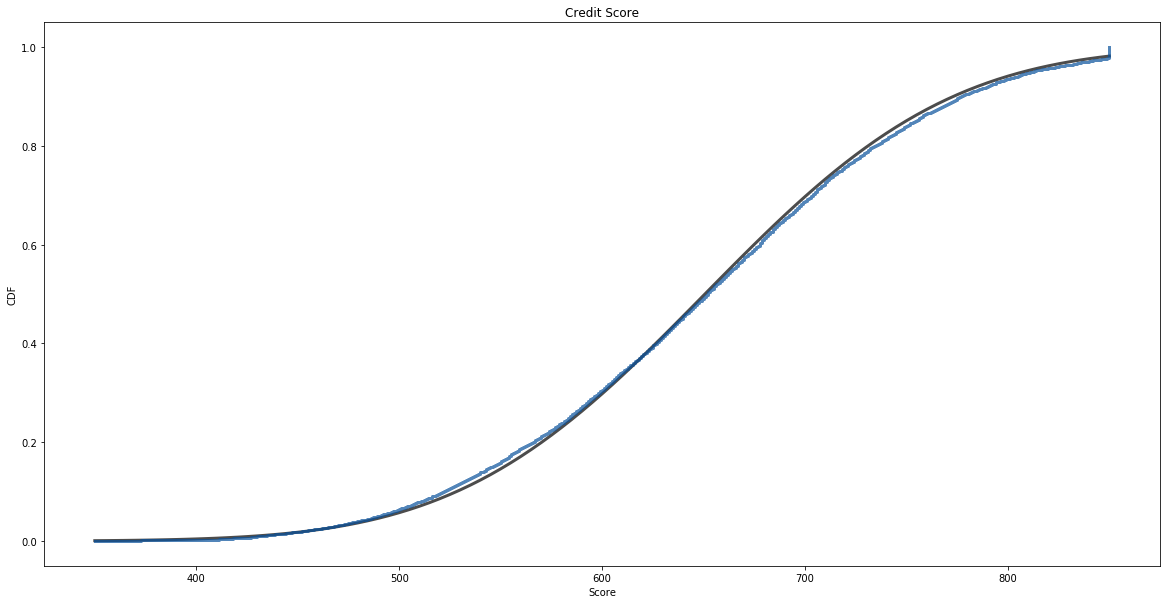

In [270]:
xs,ps = thinkstats2.RenderNormalCdf(mu,sigma,low =350, high = 850)

thinkplot.Plot(xs,ps, label = 'model', color = 'black')
cdf2 = thinkstats2.Cdf(df.CreditScore,label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf2)
thinkplot.Config(title='Credit Score',
                xlabel = 'Score',
                ylabel = 'CDF')

#### seems that the credit score is a good fit... too well.... , although the actual data might stretch slightly.. 

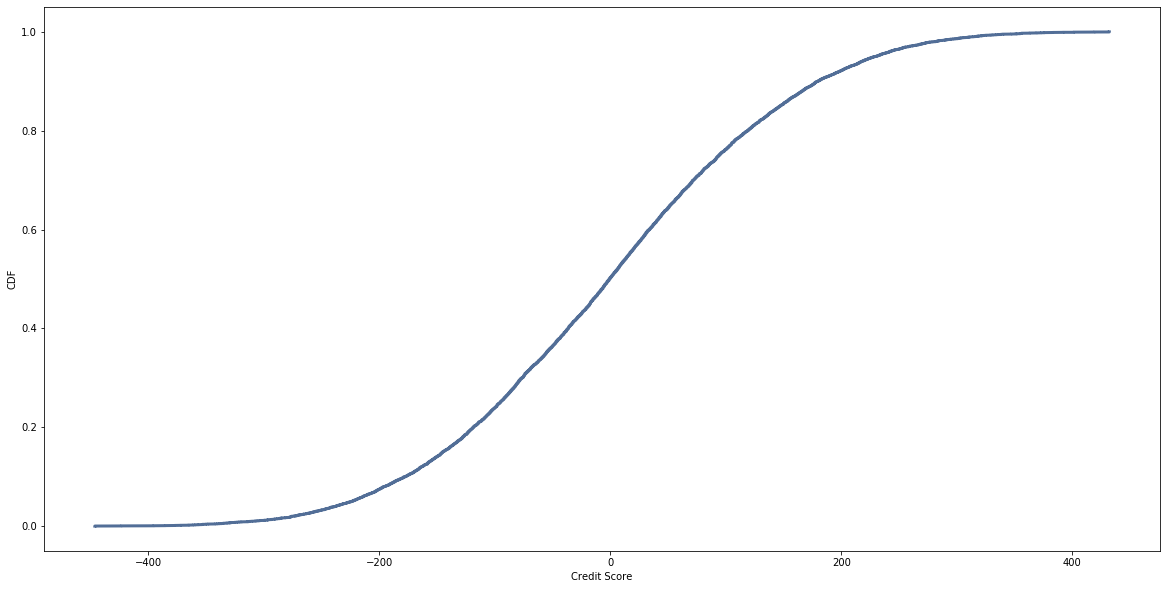

<Figure size 576x432 with 0 Axes>

In [293]:
# cdf of credit score 
diffs = df.CreditScore.diff()
cdf1 = thinkstats2.Cdf(diffs, label ='actual')
thinkplot.Cdf(cdf1)
thinkplot.Show(xlabel='Credit Score', ylabel ='CDF')

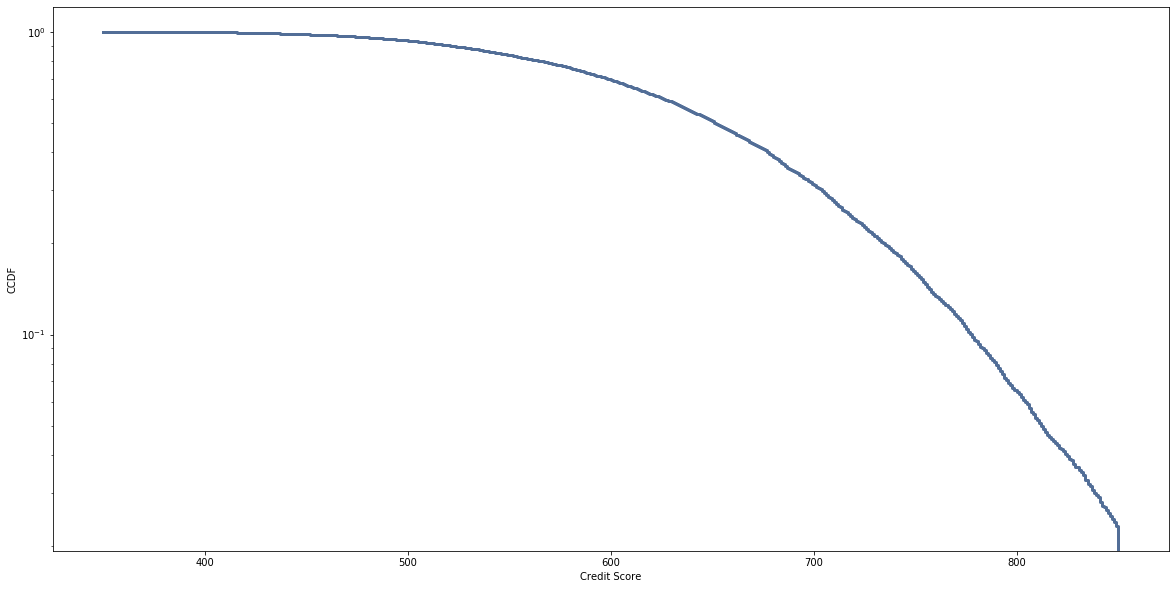

<Figure size 576x432 with 0 Axes>

In [294]:
# Ccdf on log scale 
thinkplot.Cdf(cdf, complement= True)
thinkplot.Show(xlabel = 'Credit Score', ylabel='CCDF', yscale='log')

####  yikes, tried this 2 different ways hard to read this one 

# 2 scatter plots 

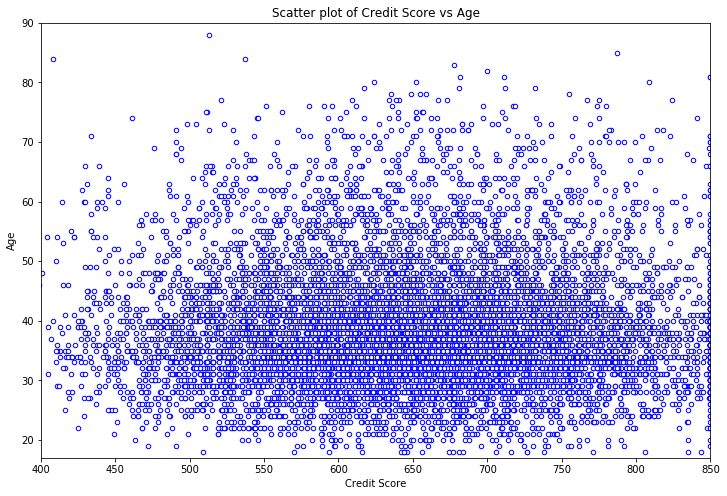

<Figure size 576x432 with 0 Axes>

In [209]:
# scatterplot of creditscore vs age 
credit = df['CreditScore']
age = df['Age']
thinkplot.figure(figsize=(12,8))
thinkplot.Scatter(credit, age, alpha= 1.0, color='white',s= 20, edgecolors='blue')
thinkplot.Show(xlabel='Credit Score',
                     ylabel='Age',
                     xlim=[400, 850],
                     ylim=[17, 90],
                     legend=False ,
                     title="Scatter plot of Credit Score vs Age")

In [210]:
# finding out correlation between credit ang age wit pearson
pearson = thinkstats2.Corr(credit,age)
print('Pearson\'s Correlation:{}'.format(pearson))

Pearson's Correlation:-0.00396490552539007


In [211]:
# correlation between credit and age with spearman
spearman = thinkstats2.SpearmanCorr(credit,age)
print('Spearman\'s Correlation:{}'.format(spearman))

Spearman's Correlation:-0.007974044311824222


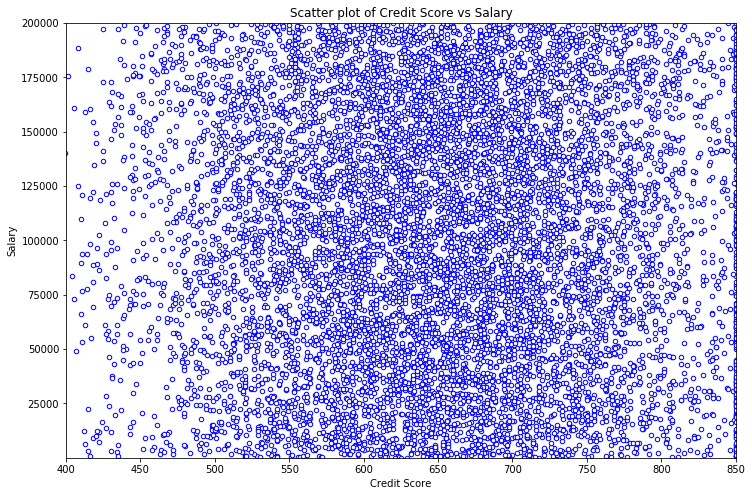

<Figure size 576x432 with 0 Axes>

In [306]:
# scatterplot of creditscore vs salary
#credit = df['CreditScore']
salary = df['EstimatedSalary']
thinkplot.figure(figsize=(12,8))
thinkplot.Scatter(credit, salary, alpha= 1.0, color='white',s= 20, edgecolors='blue')
thinkplot.Show(xlabel='Credit Score',
                     ylabel='Salary',
                     xlim=[400, 850],
                     ylim=[10, 200000],
                     legend=False ,
                     title="Scatter plot of Credit Score vs Salary")

In [215]:
# finding out correlation between credit ang salary wit pearson
pearson2 = thinkstats2.Corr(credit,salary)
print('Pearson\'s Correlation:{}'.format(pearson2))

Pearson's Correlation:-0.0013842928679845183


In [216]:
# correlation between credit and age with spearman
spearman2 = thinkstats2.SpearmanCorr(credit,salary)
print('Spearman\'s Correlation:{}'.format(spearman2))

Spearman's Correlation:0.0012365243785171628


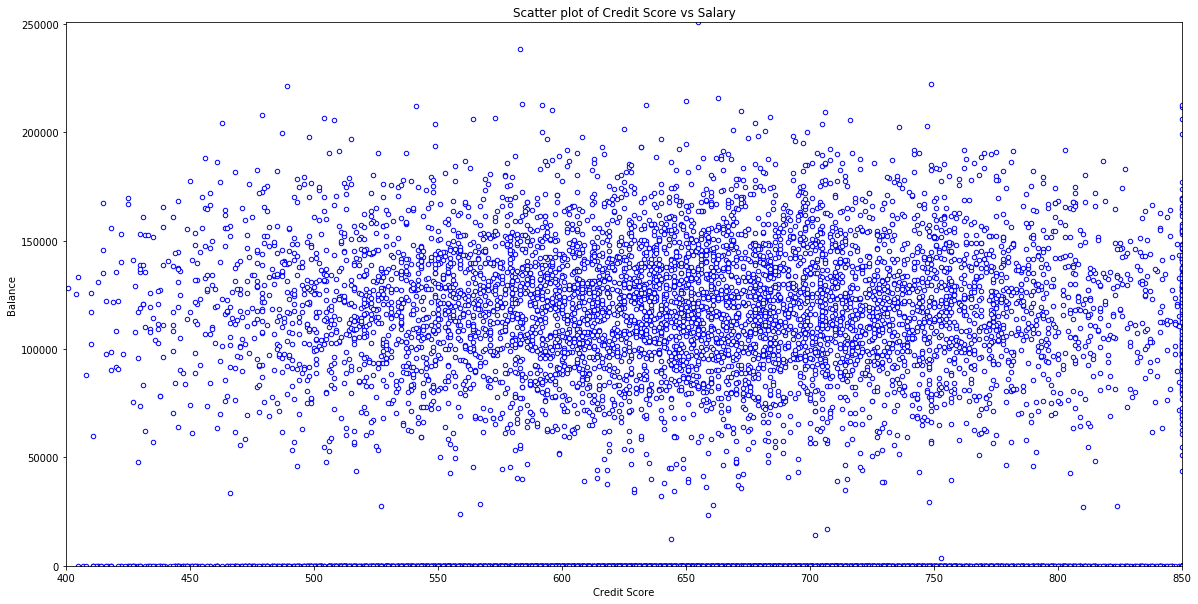

<Figure size 576x432 with 0 Axes>

In [218]:
# scatterplot of balance vs credit
Balance = df['Balance']
thinkplot.figure(figsize=(20,10))
thinkplot.Scatter(credit, Balance, alpha= 1.0, color='white',s= 20, edgecolors='blue')
thinkplot.Show(xlabel='Credit Score',
                     ylabel='Balance',
                     xlim=[400, 850],
                     ylim=[0, 250898],
                     legend=False ,
                     title="Scatter plot of Credit Score vs Balance")

In [219]:
# finding out correlation between credit ang balance with pearson
pearson3 = thinkstats2.Corr(credit,Balance)
print('Pearson\'s Correlation:{}'.format(pearson3))

Pearson's Correlation:0.0062683816160087205


In [220]:
# correlation between credit and balance with spearman
spearman3 = thinkstats2.SpearmanCorr(credit,Balance)
print('Spearman\'s Correlation:{}'.format(spearman3))

Spearman's Correlation:0.005686570567648804


In [295]:
# covariance 
# function grabbed from textbook
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [297]:
# Covariance between creditscore and Customer Exit status
Cov(df.CreditScore, df.Exited)

-1.0546165599999997

In [298]:
# Covariance between creditscore and Customer Exit status
Cov(df.CreditScore, df.Balance)

37800.29659050566

###  now, covariance shoes us if those two variables are positive or negative but it does not show us the strength. 

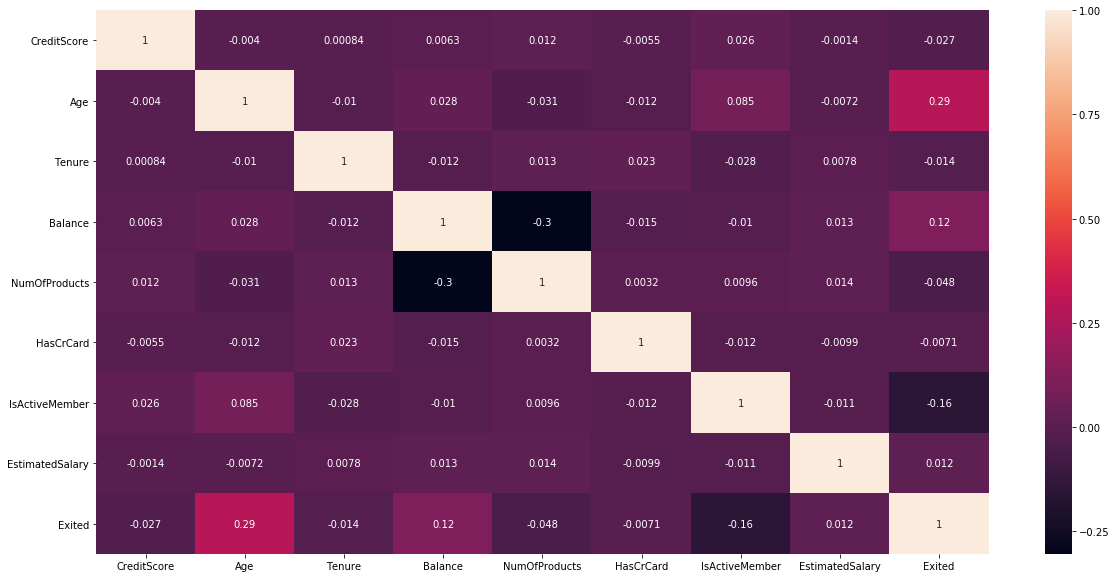

In [232]:
# pearson 
correlation = df.corr()
#plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
# fixes the borders found this code on google
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 


In [ ]:
# okay so now this correlation map is going to show me which variables are linear or non linear. 
#seems that credit score and age are sighlty correlated as well as active member.

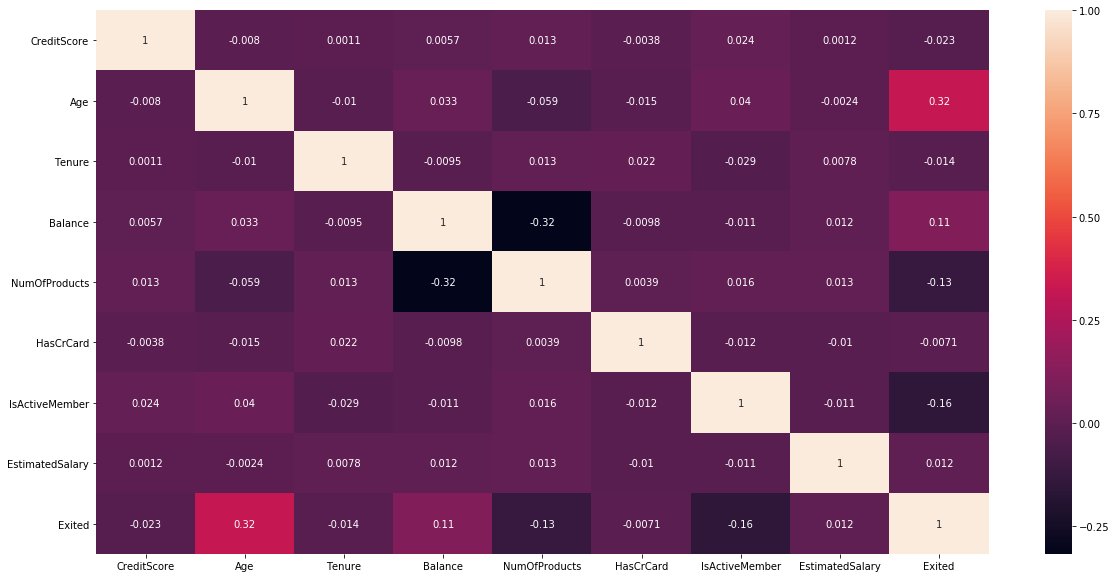

In [300]:
# Spearman
correlation = df.corr('spearman')
#plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
# fixes the borders found this code on google
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [302]:
# linear Regression 
formula = 'Exited ~ CreditScore'
model = smf.ols(formula, data=df)
results = model.fit()


In [303]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.345
Date:                Sat, 30 May 2020   Prob (F-statistic):            0.00674
Time:                        12:16:03   Log-Likelihood:                -5091.3
No. Observations:               10000   AIC:                         1.019e+04
Df Residuals:                    9998   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2771      0.027     10.115      0.000       0.223       0.331
CreditScore    -0.0001   4.17e-05     -2.710      0.007      -0.000   -3.12e-05
==============================================================================
Omnibus:                     2041.209   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3612.134
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                       3.165   Cond. No.                     4.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
inter = results.params['Intercept']
slope = results.params['CreditScore']
inter,slope

(0.27714651348262426, -0.00011290278536880139)